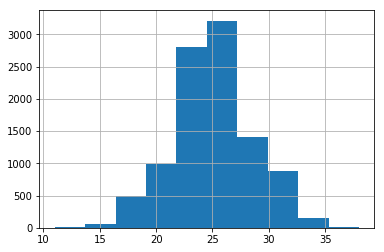

In [1]:
import numpy as np
import pandas as pd

q = []
for i in range(10000):
    q.append(np.random.binomial(50,0.5))

%matplotlib inline
pd.Series(q).hist()

In [2]:
def generative_model(prob):
    return np.random.binomial(50, prob)

0    0.093767
1    0.888385
2    0.405951
3    0.670183
4    0.082155
dtype: float64

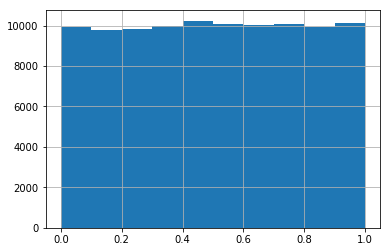

In [3]:
import pandas as pd

n_draws = 100000
prior = pd.Series(np.random.uniform(0, 1, size=n_draws))
display(prior.head())
prior.hist()

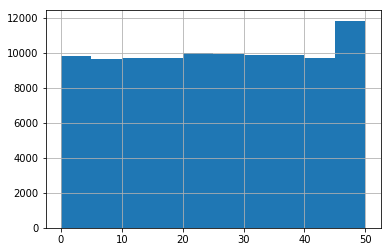

In [4]:
x = []
for p in prior:
    x.append(generative_model(p))
x = pd.Series(x)

x.hist()

In [6]:
observed = 10
posterior = prior[list(map(lambda x: x == observed, x))]
display(posterior.shape)
posterior.head()


(1904,)

61     0.204754
83     0.214456
107    0.083265
116    0.184585
135    0.277386
dtype: float64

61     0.204754
83     0.214456
107    0.083265
116    0.184585
135    0.277386
dtype: float64

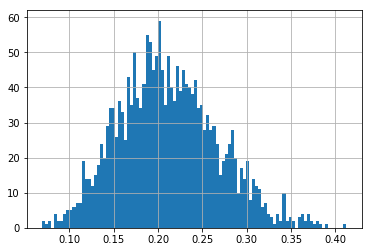

In [13]:
display(posterior.head())
posterior.hist(bins=100)

In [8]:
posterior.describe()

count    1904.000000
mean        0.211314
std         0.055770
min         0.069216
25%         0.171970
50%         0.206828
75%         0.247527
max         0.412370
dtype: float64

### We can see that both the mean and the median are approximately 21%. If we wanted to, we could also calculate a 95% credible interval for this distribution as follows.

In [11]:

print(posterior.quantile(.025), '|', posterior.quantile(.975))

0.11394128542551488 | 0.3271222664479327


In [15]:
rounded = posterior.round(2)
mode = rounded.mode()[0]
probability = list(rounded).count(mode)/len(rounded)
print('Maximum Likelihood Estimate: ', mode, '|', probability)

Maximum Likelihood Estimate:  0.19 | 0.0819327731092437
